<a href="https://colab.research.google.com/github/Wirenx/PersonalProject/blob/main/%D0%98%D0%9F_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПОДКЛЮЧАЕМ БИБЛИОТЕКИ


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import torchvision

qtrain = torchvision.datasets.QMNIST('_qmnist', train=True, download=True)
qtest = torchvision.datasets.QMNIST('_qmnist',what='test10k', download=True)

#ПОЛУЧЕНИЕ ДАННЫХ

In [ ]:
y_test = []
x_test = []

for i in range(len(qtest)):
  img = qtest[i][0]
  y_test.append(qtest[i][1])
  rawData = img.load()
  data = []
  for y1 in range(28):
    for x1 in range(28):
      data.append(rawData[x1,y1])
  data=np.asarray(data)
  x_test.append(data)
x_test = np.array(x_test).T
y_test = np.array(y_test)

x_test = x_test/255
n,m = x_test.shape

In [ ]:
y_train = []
x_train = []

for i in range(len(qtrain)):
  img = qtrain[i][0]
  y_train.append(qtrain[i][1])
  rawData = img.load()
  data = []
  for y1 in range(28):
    for x1 in range(28):
      data.append(rawData[x1,y1])
  data=np.asarray(data)
  x_train.append(data)
x_train = np.array(x_train).T
y_train = np.array(y_train)

x_train = x_train/255
_,m_train = x_train.shape

#ОПРЕДЕЛЕНИЕ ПРЕДСКАЗАНИЯ

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 # HIDDEN , INPUT
    b1 = np.random.rand(10, 1) - 0.5 # HIDDEN , 1
    W2 = np.random.rand(10, 10) - 0.5 # OUTPUT , HIDDEN
    b2 = np.random.rand(10, 1) - 0.5 # OUTPUT , 1
    return W1, b1, W2, b2

def ReLU(Z): # ФУНКЦИЯ АКТИВАЦИИ
    return np.maximum(Z, 0)

def softmax(Z): # ПРИВЕДЕНИЕ РЕЗУЛЬТАТОВ К РАЗМЕРУ 0<_<1
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X): # ПРЯМОЙ ПРОХОД - ВЫЧИСЛЕНИЕ РЕЗУЛЬТАТА
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


#ПРОЦЕСС ОБУЧЕНИЯ

In [ ]:
def ReLU_deriv(Z): # ПРОИЗВОДНАЯ ReLU
    return Z > 0

def one_hot(Y): # ВЕРНЫЙ ОТВЕТ ВИДА [0,0,0,0,0,0,1,0,0,0] -> 6
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): # ОБРАТНЫЙ ПРОХОД ИЛИ ВЫЧИСЛЕНИЕ ИЗМЕНЕНИЯ ВЕСОВ
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): # ОБНОВЛЕНИЕ ПАРАМЕТРОВ ВЕСОВ
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2): # ПОЛУЧЕНИЕ ОТВЕТА
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y): # ИЗМЕРЯЕМ ТОЧНОСТЬ
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations): # ГРАДИЕНТНЫЙ СПУСК ИЛИ ПРОЦЕСС ОБУЧЕНИЯ
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
alpha = 0.05
epoches = 1500

In [ ]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, alpha, epoches)

#ГОТВАЯ НЕЙРОСЕТЬ


In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_test[:, index, None]
    prediction = make_predictions(x_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


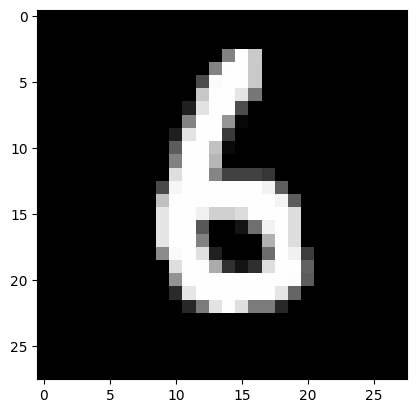

Prediction:  [7]
Label:  7


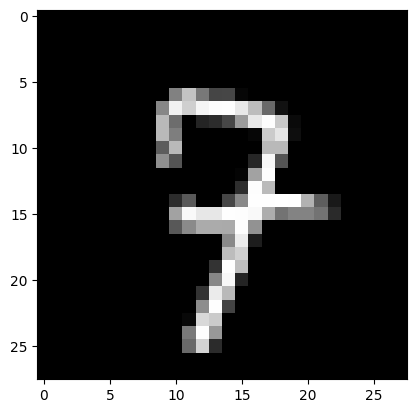

Prediction:  [0]
Label:  8


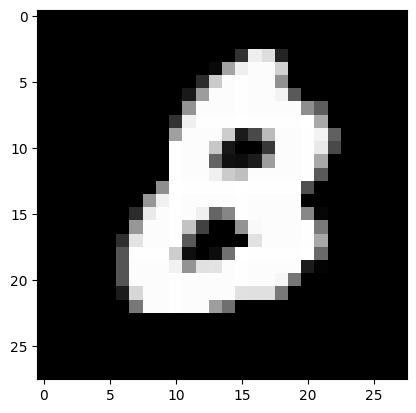

Prediction:  [9]
Label:  9


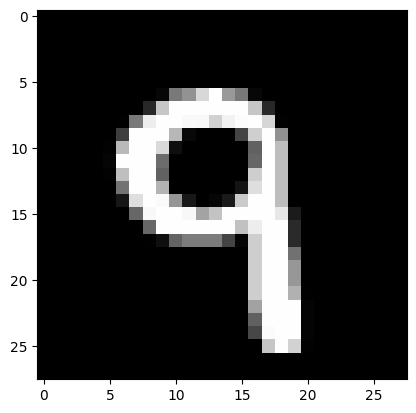

In [ ]:
from random import randint

test_prediction(randint(0, len(x_test)), W1, b1, W2, b2)
test_prediction(randint(0, len(x_test)), W1, b1, W2, b2)
test_prediction(randint(0, len(x_test)), W1, b1, W2, b2)
test_prediction(randint(0, len(x_test)), W1, b1, W2, b2)